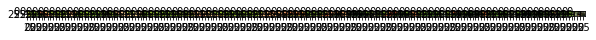

In [76]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
from torchvision import transforms, models
from PIL import Image

def Im2Patch(img, win, stride=1):
    k = 0
    endc = img.shape[0]
    endw = img.shape[1]
    endh = img.shape[2]
    patch = img[:, 0:endw-win+0+1:stride, 0:endh-win+0+1:stride]
    TotalPatNum = patch.shape[1] * patch.shape[2]
    Y = np.zeros([endc, win*win,TotalPatNum], np.float32)
    for i in range(win):
        for j in range(win):
            patch = img[:,i:endw-win+i+1:stride,j:endh-win+j+1:stride]
            Y[:,k,:] = np.array(patch[:]).reshape(endc, TotalPatNum)
            k = k + 1
    return Y.reshape([endc, win, win, TotalPatNum])

def Im2PatchNP(img, win, stride=1):
    k = 0
    endc = img.shape[2]
    endw = img.shape[1]
    endh = img.shape[0]
    patch = img[0:endh-win+0+1:stride, 0:endw-win+0+1:stride, :]
    TotalPatNum = patch.shape[0] * patch.shape[1]
    Y = np.zeros([win*win,TotalPatNum, endc], np.float32)
    for i in range(win):
        for j in range(win):
            patch = img[i:endh-win+i+1:stride, j:endw-win+j+1:stride, :]
            Y[k,:,:] = np.array(patch[:]).reshape(TotalPatNum, endc)
            k = k + 1
    return Y.reshape([win, win, TotalPatNum, endc])

# img = cv2.imread('../data/train/12003.jpg')
# h, w, c = img.shape
# print(img.shape)
# img = cv2.resize(img, img.shape[:2], interpolation=cv2.INTER_CUBIC)
# # img = np.expand_dims(img[:,:,0].copy(), 0)
# img = np.reshape(img, (img.shape[2], img.shape[0], img.shape[1]))
# print(img.shape)
# patches = Im2Patch(img, 150, 150)
# print(patches.shape)

# fig = plt.figure(figsize=(10,20))
# fig.add_subplot(1,3,1)
# tensor = torch.Tensor(np.flip(patches[:, :, :, 0], 0).copy())
# plt.imshow(transforms.ToPILImage()(tensor))

img = Image.open("../data/train/12003.jpg")
img = np.asarray(img)
patches = Im2PatchNP(img, 40, 40)
patch = patches[:,:,1,:].astype(np.uint8)
# plt.imshow((patch))

fig = plt.figure(figsize=(10,20))
for i in range(patches.shape[2]):
    fig.add_subplot(patches.shape[2] / 2,patches.shape[2] / 2,i + 1)
    plt.imshow(patches[:,:,i,:].astype(np.uint8))
plt.show()

